# Solving the differential equation for a low-pass filter

This is a Jupyter notebook to determine a function for an electrical signal output from a low-pass filter. We are solving the equation $ \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in} - V_{\rm out}) $ for inputs:
$$
IR = V_{\rm in} - V_{\rm out}, \\
 Q = C V_{\rm out}, \\
 I = \frac{dQ}{dt}.$$

First we import numpy and matplot lib for plotting and calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then we define a function V_in to generate the square wave input, and plot it on a graph to check it works. To make the function more general (to any wave, we define start and end points and a step, from which we generate the array of t values.

In [2]:
def V_in(t):
    '''Returns a square wave varying with time t'''
    V_in = (-1)**(np.floor(2*t))
    return V_in

In [3]:
t_start = -5
t_end = 5
h = 0.0001 # Step interval
RC = 1 # Time constant

V_out = 0.0 # initial value of V_out

(-1.5, 1.5)

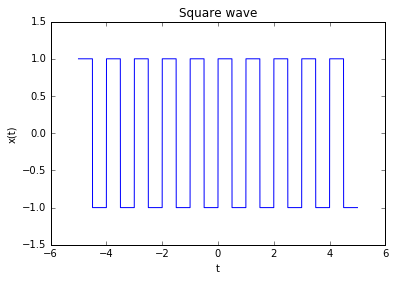

In [4]:
tpoints = np.arange(t_start,t_end,h) # Create a dummy array 

plt.plot(tpoints,V_in(tpoints),label="Square wave varying over time")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Square wave')
plt.ylim(-1.5,1.5)

Now we create a function of the right hand side of the differential equation, and the Runge Kutta function we use to solve the differential.

In [5]:
def f(V_out,tpoints,RC):
    '''Numerical function for a low pass filter:
    RC is the time constant of the circuit
    V_in is the input voltage
    V_out is the variable we solve for'''
    return (V_in(tpoints)-V_out)/RC

From the script:
$$
k_1 = h f(x,t), \\
k_2 = h f(x+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h f(x+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h f(x+k_3, t+h), \\
x(t+h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$

In [6]:
def RungeKutta4(V_out,tpoints,RC):
    '''Fourth-order Runge Kutta. Inputs: initial V_out, array of t-values
    Also depends on step h (global variable) and
    requires the function f(x,t) to be defined.
    Returns: array of propagated xpoints'''
    xpoints = []
    for t in tpoints:
        xpoints.append(V_out) 
        k1 = h*f(V_out,t,RC)     
        k2 = h*f(V_out+0.5*k1, t+0.5*h,RC)
        k3 = h*f(V_out+0.5*k2, t+0.5*h,RC)
        k4 = h*f(V_out+k3, t+h,RC)
        V_out = V_out + (k1 + 2*k2 + 2*k3 + k4)/6
    return xpoints

In [7]:
xpointsRK4 = RungeKutta4(V_out,tpoints,RC)

(-1.5, 1.5)

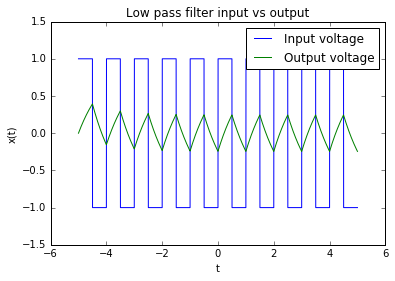

In [8]:
plt.plot(tpoints,V_in(tpoints), label="Input voltage")
plt.plot(tpoints,xpointsRK4, label="Output voltage")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Low pass filter input vs output')
plt.legend(loc=0)
plt.ylim(-1.5,1.5)

Now we know the function works, let's plot it for some more realistic variables, and different values for the time constant RC:

In [9]:
RC = 0.01
t_start = 0
t_end = 10
N = 1000
h = (t_end-t_start)/N

tpoints = np.arange(t_start,t_end,h)

(-1.5, 1.5)

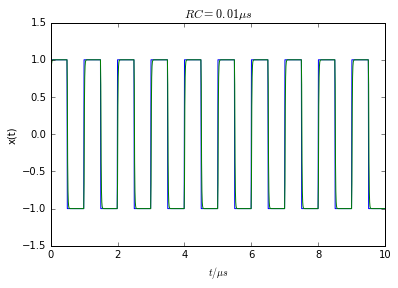

In [10]:
plt.plot(tpoints,V_in(tpoints),label="Square wave")
plt.plot(tpoints,RungeKutta4(V_out,tpoints,RC), label="Low pass filter")
plt.xlabel('$t/\mu s$')
plt.ylabel('x(t)')
plt.title('$RC = 0.01\mu s$')
plt.ylim(-1.5,1.5)

(-1.5, 1.5)

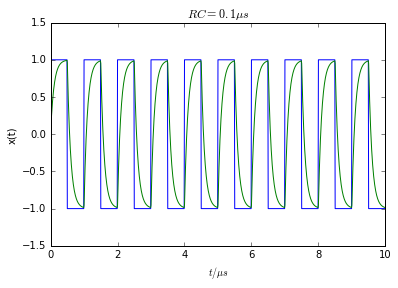

In [11]:
RC = 0.1

plt.plot(tpoints,V_in(tpoints),label="Square wave")
plt.plot(tpoints,RungeKutta4(V_out,tpoints,RC), label="Low pass filter")
plt.xlabel('$t/\mu s$')
plt.ylabel('x(t)')
plt.title('$RC = 0.1\mu s$')
plt.ylim(-1.5,1.5)

(-1.5, 1.5)

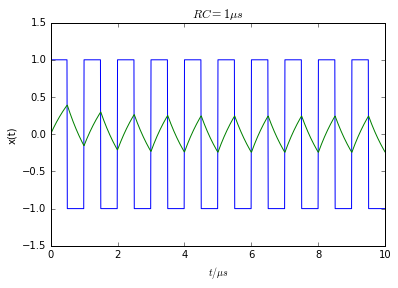

In [12]:
RC = 1

plt.plot(tpoints,V_in(tpoints),label="Square wave")
plt.plot(tpoints,RungeKutta4(V_out,tpoints,RC), label="Low pass filter")
plt.xlabel('$t/\mu s$')
plt.ylabel('x(t)')
plt.title('$RC = 1\mu s$')
plt.ylim(-1.5,1.5)

When the time constant is small, the output of the low-pass filter approximates the original square wave. As the time constant increases, the square wave is attenuated more, such that at very large values of RC (10 $\mu s$ or more), the wave amplitude goes to zero. The effect of this is to smooth out the input, and make discontinuities or jumps in the function less noticeable, as well as reducing high-frequency signals (such as noise) from the output.

We now see what happens if we use a sine wave as the input:

In [13]:
def V_in_sine (t):
    '''Generates a sine wave for input t'''
    V_in = np.sin(2*t)
    return V_in

def f(V_out,tpoints,RC):
    '''Numerical function for a low pass filter:
    RC is the time constant of the circuit
    V_in is the input voltage
    V_out is the variable we solve for'''
    return (V_in_sine(tpoints)-V_out)/RC

(-4, 1.5)

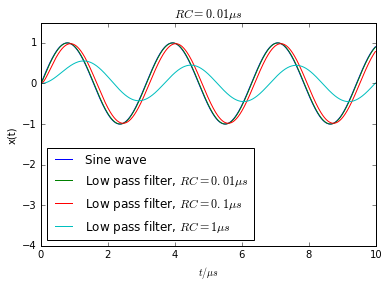

In [14]:
plt.plot(tpoints,V_in_sine(tpoints),label="Sine wave")
plt.plot(tpoints,RungeKutta4(V_out,tpoints,0.01), label="Low pass filter, $RC=0.01\mu s$")
plt.plot(tpoints,RungeKutta4(V_out,tpoints,0.1), label="Low pass filter, $RC=0.1\mu s$")
plt.plot(tpoints,RungeKutta4(V_out,tpoints,1), label="Low pass filter, $RC=1\mu s$")
plt.xlabel('$t/\mu s$')
plt.ylabel('x(t)')
plt.title('$RC = 0.01\mu s$')
plt.legend(loc=0)
plt.ylim(-4,1.5)

Here, at low values of RC the filter has almost no effect. It is only at higher values of RC that the signal is meaningfully attenuated.